**STEP 1: Data Loading and Preprocessing**

In [1]:
%pip install pandas
%pip install scikit-learn --upgrade
%pip install torch
%pip install matplotlib
%pip install numpy

import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 55.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2


In [7]:
data=pd.read_csv('league_of_legends_data_large.csv')
x= data.drop('win',axis=1)
y=data['win']
print("values:", x)
train_x,test_x,train_y,test_y= train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.transform(test_x)
tensor_train_x=torch.tensor(train_x,dtype=torch.float32)
tensor_test_x=torch.tensor(test_x,dtype=torch.float32)
tensor_train_y=torch.tensor(train_y.values,dtype=torch.float32)
tensor_test_y=torch.tensor(test_y.values,dtype=torch.float32)

values:      kills  deaths  assists  gold_earned   cs  wards_placed  wards_killed  \
0       16       6       19        17088  231            11             7   
1        8       8        5        14865  259            10             2   
2        0      17       11        15919  169            14             5   
3       19      11        1        11534  264            14             3   
4       12       7        6        18926  124            15             7   
..     ...     ...      ...          ...  ...           ...           ...   
995      2      15       12        17170  294             8             6   
996      5      13        4        19524  236            14             3   
997      8       7        8         7961  139            11             7   
998      5      17        5         8226  193             9             9   
999      8       9        4        18878   55            18             9   

     damage_dealt  
0           15367  
1           38332  
2      

**STEP 2: Logistic Regression Model**

In [12]:
class LogisticRegression(torch.nn.Module):
  def __init__ (self,input_dim):
    super(LogisticRegression,self).__init__()
    self.linear=torch.nn.Linear(input_dim,1)
  def forward(self,x):
    outputs=torch.sigmoid(self.linear(x))
    return outputs

input_dim = train_x.shape[1]
model = LogisticRegression(input_dim)
import torch.nn as nn
import torch.optim as optim
loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

print(model)
print(f"Initialized Logistic Regression Model with input dimensions: {input_dim}")

LogisticRegression(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)
Initialized Logistic Regression Model with input dimensions: 8


**STEP 3: Model Training**

In [19]:
epochs=1000
for epoch in range(1, epochs + 1):
    model.train()
    optimizer.zero_grad()
    outputs = model(tensor_train_x)
    loss = loss_function(outputs.squeeze(), tensor_train_y)
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

# Model Evaluation
model.eval()

# Disable gradient calculation for evaluation
with torch.no_grad():
    # Training data predictions
    train_predictions = model(tensor_train_x)
    train_predictions = (train_predictions >= 0.5).float()  # Apply threshold of 0.5

    # Test data predictions
    test_predictions = model(tensor_test_x)
    test_predictions = (test_predictions >= 0.5).float()  # Apply threshold of 0.5

    # Calculate training accuracy
    train_correct = (train_predictions == tensor_train_y).sum().item()
    train_accuracy = train_correct / tensor_train_y.size(0) * 100

    # Calculate testing accuracy
    test_correct = (test_predictions == tensor_test_y).sum().item()
    test_accuracy = test_correct / tensor_test_y.size(0) * 100

# Print accuracy results
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%")

Epoch 100/1000, Loss: 0.7102769613265991
Epoch 200/1000, Loss: 0.7009173035621643
Epoch 300/1000, Loss: 0.6950348615646362
Epoch 400/1000, Loss: 0.6913602352142334
Epoch 500/1000, Loss: 0.6890696883201599
Epoch 600/1000, Loss: 0.6876416802406311
Epoch 700/1000, Loss: 0.6867502331733704
Epoch 800/1000, Loss: 0.6861929297447205
Epoch 900/1000, Loss: 0.6858436465263367
Epoch 1000/1000, Loss: 0.6856242418289185
Training Accuracy: 40000.00%
Testing Accuracy: 10045.00%


**STEP 4: Model Optimization and Evaluation**

In [23]:

# Modify optimizer to include weight decay (L2 Regularization)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

# Number of epochs
epochs = 1000

# Training Loop with L2 Regularization
for epoch in range(1, epochs + 1):
    model.train()  # Set model to training mode

    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass: compute predictions
    outputs = model(tensor_train_x)

    # Compute the loss
    loss = loss_function(outputs.squeeze(), tensor_train_y)

    # Backward pass: compute gradients
    loss.backward()

    # Update the model parameters
    optimizer.step()

    # Print the loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")

# Model Evaluation
model.eval()  # Set model to evaluation mode

# Disable gradient calculation for evaluation
with torch.no_grad():
    # Training data predictions
    train_predictions = model(tensor_train_x)
    train_predictions = (train_predictions >= 0.5).float()  # Apply threshold of 0.5

    # Test data predictions
    test_predictions = model(tensor_test_x)
    test_predictions = (test_predictions >= 0.5).float()  # Apply threshold of 0.5

    # Calculate training accuracy
    train_correct = (train_predictions == tensor_train_y).sum().item()
    train_accuracy = train_correct / tensor_train_y.size(0) * 100

    # Calculate testing accuracy
    test_correct = (test_predictions == tensor_test_y).sum().item()
    test_accuracy = test_correct / tensor_test_y.size(0) * 100

# Print accuracy results
print("Optimized Model Performance with L2 Regularization:")
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%")


Epoch 100/1000, Loss: 0.6852667331695557
Epoch 200/1000, Loss: 0.685265302658081
Epoch 300/1000, Loss: 0.6852642297744751
Epoch 400/1000, Loss: 0.685263454914093
Epoch 500/1000, Loss: 0.68526291847229
Epoch 600/1000, Loss: 0.6852624416351318
Epoch 700/1000, Loss: 0.685262143611908
Epoch 800/1000, Loss: 0.6852619051933289
Epoch 900/1000, Loss: 0.6852616667747498
Epoch 1000/1000, Loss: 0.6852615475654602
Optimized Model Performance with L2 Regularization:
Training Accuracy: 40025.00%
Testing Accuracy: 10080.00%


**STEP 5: Visualization and Interpretation**

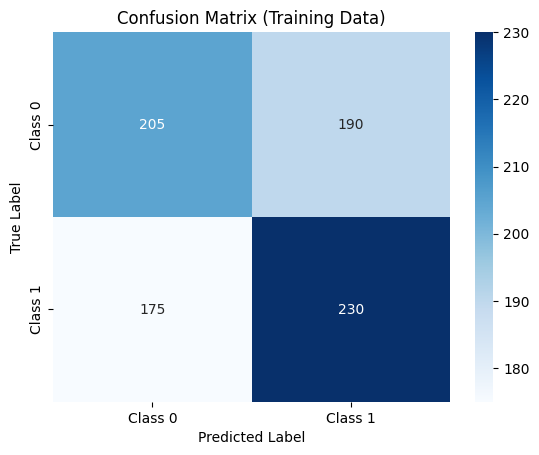

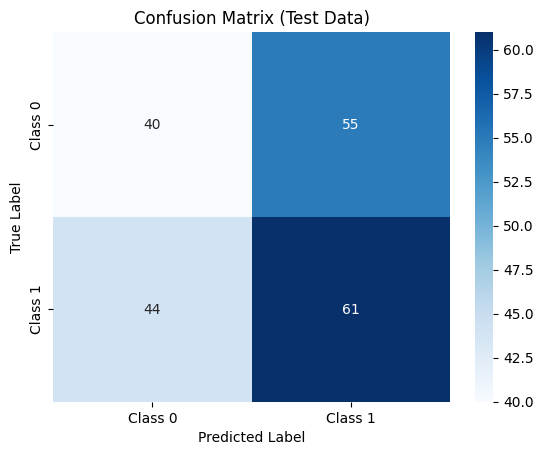

Classification Report (Training Data):
              precision    recall  f1-score   support

     Class 0       0.54      0.52      0.53       395
     Class 1       0.55      0.57      0.56       405

    accuracy                           0.54       800
   macro avg       0.54      0.54      0.54       800
weighted avg       0.54      0.54      0.54       800

Classification Report (Test Data):
              precision    recall  f1-score   support

     Class 0       0.48      0.42      0.45        95
     Class 1       0.53      0.58      0.55       105

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



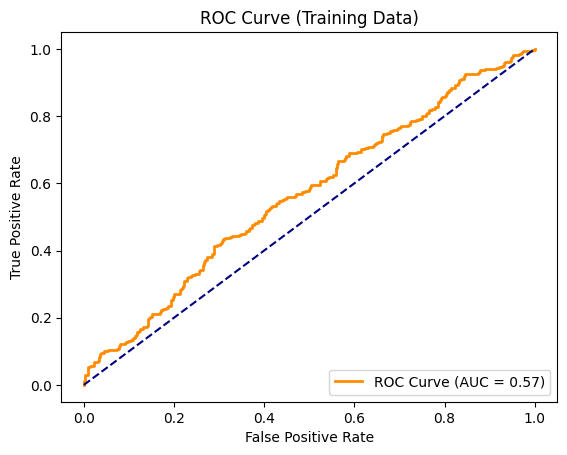

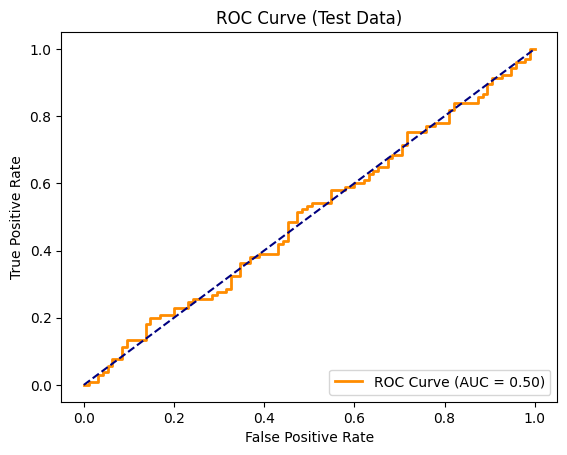

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Model Evaluation (Predictions for visualization)
model.eval()  # Set the model to evaluation mode

with torch.no_grad():
    train_probs = model(tensor_train_x).numpy()
    test_probs = model(tensor_test_x).numpy()

    # Apply threshold of 0.5 for classification
    train_predictions = (train_probs >= 0.5).astype(int)
    test_predictions = (test_probs >= 0.5).astype(int)

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Plot Confusion Matrix for Training and Test Data
plot_confusion_matrix(tensor_train_y.numpy(), train_predictions, "Confusion Matrix (Training Data)")
plot_confusion_matrix(tensor_test_y.numpy(), test_predictions, "Confusion Matrix (Test Data)")

# Classification Report
print("Classification Report (Training Data):")
print(classification_report(tensor_train_y.numpy(), train_predictions, target_names=["Class 0", "Class 1"]))

print("Classification Report (Test Data):")
print(classification_report(tensor_test_y.numpy(), test_predictions, target_names=["Class 0", "Class 1"]))

# ROC Curve and AUC
def plot_roc_curve(y_true, y_probs, title):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC Curve for Training and Test Data
plot_roc_curve(tensor_train_y.numpy(), train_probs, "ROC Curve (Training Data)")
plot_roc_curve(tensor_test_y.numpy(), test_probs, "ROC Curve (Test Data)")


**STEP 6: Model Saving and Loading**

In [26]:
import torch

# Step 1: Save the Trained Model
torch.save(model.state_dict(), 'logistic_regression_model.pth')  # Save the state dictionary
print("Model saved successfully!")

# Step 2: Load the Model
# Create a new instance of the model
loaded_model = LogisticRegression(input_dim=tensor_train_x.shape[1])

# Load the saved parameters into the new model instance
loaded_model.load_state_dict(torch.load('logistic_regression_model.pth'))
print("Model loaded successfully!")

# Step 3: Evaluate the Loaded Model
loaded_model.eval()  # Set the loaded model to evaluation mode

# Evaluate on Test Dataset
with torch.no_grad():
    test_probs_loaded = loaded_model(tensor_test_x).numpy()  # Generate predictions
    test_predictions_loaded = (test_probs_loaded >= 0.5).astype(int)  # Apply threshold of 0.5

# Calculate Accuracy of Loaded Model
accuracy_loaded = (test_predictions_loaded.flatten() == tensor_test_y.numpy()).mean()
print(f"Accuracy of the loaded model on test data: {accuracy_loaded * 100:.2f}%")

# Verify Consistency of Results
if torch.allclose(torch.tensor(test_probs), torch.tensor(test_probs_loaded), atol=1e-6):
    print("The loaded model produces consistent results!")
else:
    print("There is a discrepancy between the original and loaded model.")


Model saved successfully!
Model loaded successfully!
Accuracy of the loaded model on test data: 50.50%
The loaded model produces consistent results!


<ipython-input-26-8c87088589f1>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('logistic_regression_model.pth'))


**STEP 7: Hyperparameter Tuning**

In [28]:

# Step 1: Define Learning Rates to Test
learning_rates = [0.01, 0.05, 0.1]
num_epochs = 100
best_lr = None
best_test_accuracy = 0.0
results = {}

for lr in learning_rates:
    print(f"Testing Learning Rate: {lr}")

    # Step 2: Reinitialize Model, Loss, and Optimizer
    model = LogisticRegression(input_dim=tensor_train_x.shape[1])  # Reinitialize model
    criterion = torch.nn.BCELoss()  # Binary Cross-Entropy Loss
    optimizer = optim.SGD(model.parameters(), lr=lr)  # Optimizer with current learning rate

    # Step 3: Train the Model for Current Learning Rate
    for epoch in range(num_epochs):
        model.train()  # Set to training mode

        optimizer.zero_grad()  # Reset gradients
        outputs = model(tensor_train_x)  # Forward pass
        loss = criterion(outputs.squeeze(), tensor_train_y)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        if (epoch + 1) % 20 == 0:  # Print loss every 20 epochs
            print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

    # Step 4: Evaluate the Model on Test Data
    model.eval()  # Set to evaluation mode
    with torch.no_grad():
        test_probs = model(tensor_test_x).numpy()
        test_predictions = (test_probs >= 0.5).astype(int)

    # Calculate Test Accuracy
    test_accuracy = (test_predictions.flatten() == tensor_test_y.numpy()).mean()
    print(f"Test Accuracy with LR={lr}: {test_accuracy * 100:.2f}%")

    # Store Results
    results[lr] = test_accuracy

    # Update Best Learning Rate
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_lr = lr

# Step 5: Report the Best Learning Rate
print("\nHyperparameter Tuning Results:")
for lr, acc in results.items():
    print(f"Learning Rate: {lr}, Test Accuracy: {acc * 100:.2f}%")

print(f"\nBest Learning Rate: {best_lr}, Test Accuracy: {best_test_accuracy * 100:.2f}%")


Testing Learning Rate: 0.01
Epoch [20/100], Loss: 0.7154
Epoch [40/100], Loss: 0.7128
Epoch [60/100], Loss: 0.7104
Epoch [80/100], Loss: 0.7082
Epoch [100/100], Loss: 0.7062
Test Accuracy with LR=0.01: 55.50%
Testing Learning Rate: 0.05
Epoch [20/100], Loss: 0.7097
Epoch [40/100], Loss: 0.7000
Epoch [60/100], Loss: 0.6941
Epoch [80/100], Loss: 0.6906
Epoch [100/100], Loss: 0.6884
Test Accuracy with LR=0.05: 52.50%
Testing Learning Rate: 0.1
Epoch [20/100], Loss: 0.7014
Epoch [40/100], Loss: 0.6912
Epoch [60/100], Loss: 0.6875
Epoch [80/100], Loss: 0.6861
Epoch [100/100], Loss: 0.6856
Test Accuracy with LR=0.1: 53.00%

Hyperparameter Tuning Results:
Learning Rate: 0.01, Test Accuracy: 55.50%
Learning Rate: 0.05, Test Accuracy: 52.50%
Learning Rate: 0.1, Test Accuracy: 53.00%

Best Learning Rate: 0.01, Test Accuracy: 55.50%


**STEP 8: Feature Importance**

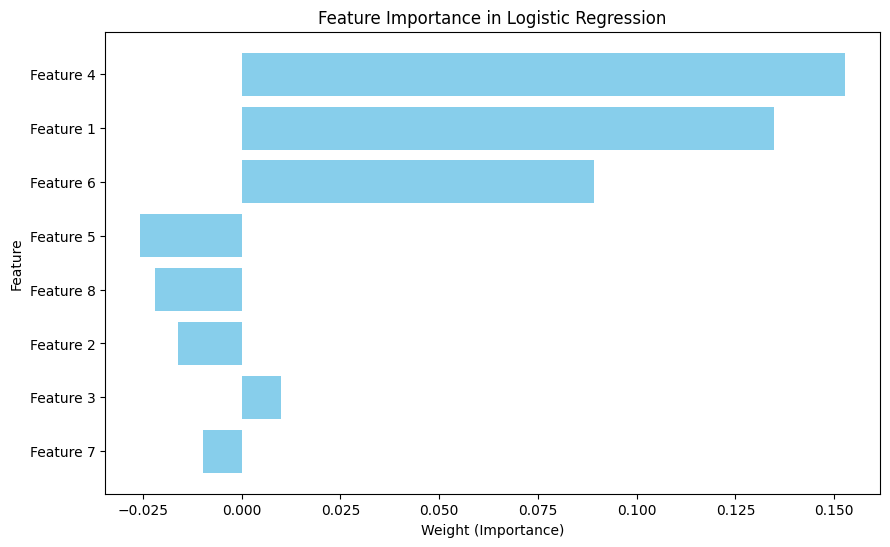


Feature Importance:
     Feature  Importance
3  Feature 4    0.152718
0  Feature 1    0.134703
5  Feature 6    0.089255
4  Feature 5   -0.025613
7  Feature 8   -0.021946
1  Feature 2   -0.016114
2  Feature 3    0.009920
6  Feature 7   -0.009742


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract Model Weights
weights = model.linear.weight.data.numpy().flatten()  # Extract weights and flatten to 1D array

# Assuming feature names are available, e.g., from a pandas DataFrame
# Replace 'feature_names' with your actual feature names list or DataFrame column names
feature_names = [f"Feature {i+1}" for i in range(tensor_train_x.shape[1])]

# Step 2: Create a DataFrame for Feature Importance
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": weights
})

# Sort by absolute value of importance
feature_importance["Absolute Importance"] = feature_importance["Importance"].abs()
feature_importance = feature_importance.sort_values(by="Absolute Importance", ascending=False)

# Step 3: Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color="skyblue")
plt.xlabel("Weight (Importance)")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()

# Step 4: Display the Sorted DataFrame
print("\nFeature Importance:")
print(feature_importance.drop(columns=["Absolute Importance"]))
